In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('covid-19-vaccination-progress')
jovian.set_colab_id('1xooZGv08HtSNYd8EIkzdkOKR3oUogUb9')

     |████████████████████████████████| 71kB 6.1MB/s 


# Covid-19 Analyzing Vaccination progress WorldWide

The dataset used for analysis was retreieved from kaggle, we are here trying to find the progress of vaccine distrubution worldwide and the companies reponsible for the same. Here, we have mainly used pandas library and with the help of sets and lists we were able to clean the data and after retreiveing that we were sucessfully able to get graphical visualization of the data. I gained maximum knowledge about data analysis and the functions of pandas and matplotlib library from the course avaialbe at jovian.ai [Data Analysis with Python: Zero to Pandas](zerotopandas.com). 

## Downloading the Dataset

To add the dataset to your project use **opendataset** library for python. Copy the url and download the dataset by providing your username and API key for Kaggle.  

In [2]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
# Change this
dataset_url = 'https://www.kaggle.com/gpreda/covid-world-vaccination-progress' 

In [4]:
!pip install -q kaggle

In [5]:
from google.colab import files

In [6]:
files.upload()

MessageError: ignored

In [ ]:
 ! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27            119  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              215KB  2021-03-04 07:44:29             28  
nickuzmenkov/ranzcr-clip-kfold-tfrecords                    RANZCR CLiP KFold TFRecords                         2GB  2021-02-21 13:29:51              8  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-02-17 16:10:44             56  
landrykezebou/lvzhdr-tone-mapping-benchmark-dataset-tmonet  LVZ-HDR Tone Map

In [ ]:
import opendatasets as od
od.download(dataset_url)

100%|██████████| 111k/111k [00:00<00:00, 18.1MB/s]

The dataset has been downloaded and extracted.

In [ ]:
# Change this
data_dir = './covid-world-vaccination-progress'

In [ ]:
import os
os.listdir(data_dir)

['country_vaccinations.csv']

Let us save and upload our work to Jovian before continuing.

## Data Preparation and Cleaning

The data was collected for government sources availabe online and some information may not be availabe for all the countries that may result in many NaN values which may reduce the accuracy of the analysis. We use isnull function of pandas library to remove the columns with more than 50% NaN values 



In [ ]:
import pandas as pd

In [ ]:
os.listdir(data_dir)


['country_vaccinations.csv']

In [ ]:
covid_world = pd.read_csv('./covid-world-vaccination-progress/country_vaccinations.csv')

#**DataSet**
You can see the raw data retreived form the kaggle API below. It has not been cleaned or used yet. 

In [ ]:
covid_world

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,Zimbabwe,ZWE,2021-02-26,12579.0,12579.0,NaN,1572.0,1750.0,0.08,0.08,NaN,118.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366851011...
4904,Zimbabwe,ZWE,2021-02-27,15705.0,15705.0,NaN,3126.0,2150.0,0.11,0.11,NaN,145.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366851011...
4905,Zimbabwe,ZWE,2021-02-28,18843.0,18843.0,NaN,3138.0,2551.0,0.13,0.13,NaN,172.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366851011...
4906,Zimbabwe,ZWE,2021-03-01,21456.0,21456.0,NaN,2613.0,2877.0,0.14,0.14,NaN,194.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366851011...


The description or the significant values for the data can be observed using .describe() fucntion of dataframe

In [ ]:
covid_world.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,3.193000e+03,2.718000e+03,1.845000e+03,2.694000e+03,4.748000e+03,3193.000000,2718.000000,1845.000000,4748.000000
mean,1.794351e+06,1.546290e+06,5.291548e+05,7.453316e+04,5.711302e+04,7.364977,5.971126,2.385572,2462.411963
std,6.138733e+06,4.836053e+06,2.077217e+06,2.134289e+05,1.796130e+05,13.722154,9.821690,5.726119,4499.317161
min,0.000000e+00,0.000000e+00,1.000000e+00,-5.001200e+04,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,3.213300e+04,2.934400e+04,1.260000e+04,2.382500e+03,1.128000e+03,0.600000,0.640000,0.240000,325.000000
50%,2.129400e+05,1.961105e+05,5.783500e+04,1.197500e+04,5.902000e+03,2.820000,2.600000,0.880000,1056.000000
75%,9.143030e+05,8.392158e+05,2.995180e+05,5.058975e+04,2.757100e+04,7.070000,5.550000,2.080000,2290.500000
max,7.863160e+07,5.175545e+07,2.616212e+07,2.429823e+06,1.942788e+06,112.960000,72.280000,40.680000,54264.000000


Before clean we need to be sure there is something that may cause problems or miscalculations. If all the values provided below are null or zero we can skip this step.

In [ ]:
covid_world.isnull().sum()

country                                   0
iso_code                                316
date                                      0
total_vaccinations                     1715
people_vaccinated                      2190
people_fully_vaccinated                3063
daily_vaccinations_raw                 2214
daily_vaccinations                      160
total_vaccinations_per_hundred         1715
people_vaccinated_per_hundred          2190
people_fully_vaccinated_per_hundred    3063
daily_vaccinations_per_million          160
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [ ]:
def data_cleaner_basic(data):
  for i in data.columns:
    if data[i].isnull().sum() > (0.5 * data.shape[0]):
      data.drop(i,axis=1,inplace=True)


In [ ]:
covid_world.isnull().sum()

country                                   0
iso_code                                316
date                                      0
total_vaccinations                     1715
people_vaccinated                      2190
people_fully_vaccinated                3063
daily_vaccinations_raw                 2214
daily_vaccinations                      160
total_vaccinations_per_hundred         1715
people_vaccinated_per_hundred          2190
people_fully_vaccinated_per_hundred    3063
daily_vaccinations_per_million          160
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [ ]:
for i in covid_world.columns:
  if covid_world[i].isnull().sum() > (0.5*covid_world.shape[0]):
    covid_world.drop(i,axis=1,inplace=True)

In [ ]:
covid_world.isnull().sum()

country                              0
iso_code                           316
date                                 0
total_vaccinations                1715
people_vaccinated                 2190
daily_vaccinations_raw            2214
daily_vaccinations                 160
total_vaccinations_per_hundred    1715
people_vaccinated_per_hundred     2190
daily_vaccinations_per_million     160
vaccines                             0
source_name                          0
source_website                       0
dtype: int64

In [ ]:
data_cleaner_basic(covid_world)

In [ ]:
covid_world

,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,0.00,0.00,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,64.0,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,64.0,0.00,0.00,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,60.0,63.0,0.01,0.01,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,78.0,66.0,0.01,0.01,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,Zimbabwe,ZWE,2021-02-26,12579.0,12579.0,1572.0,1750.0,0.08,0.08,118.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366851011...
4904,Zimbabwe,ZWE,2021-02-27,15705.0,15705.0,3126.0,2150.0,0.11,0.11,145.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366851011...
4905,Zimbabwe,ZWE,2021-02-28,18843.0,18843.0,3138.0,2551.0,0.13,0.13,172.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366851011...
4906,Zimbabwe,ZWE,2021-03-01,21456.0,21456.0,2613.0,2877.0,0.14,0.14,194.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366851011...


In [ ]:
type(covid_world)

pandas.core.frame.DataFrame

As we can observe below the data has been cleaned as we removed all the columns with more than 50% NaN or Null values 

In [ ]:
covid_world['country'] = covid_world.country

In [ ]:
covid_world.set_index(keys=['country'], drop=False,inplace=True)
names=covid_world['country'].unique().tolist()

li = list()

for i in range(0,len(names)):
  li.append(covid_world.loc[names[i]])

In [ ]:
import jovian

In [ ]:
jovian.commit('Analysis of Vaccination progress for Covid-19')

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...


[jovian] Error: Looks like the notebook is missing output cells, please save the notebook and try jovian.commit again.


[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/vrajesh1/covid-19-vaccination-progress


'https://jovian.ai/vrajesh1/covid-19-vaccination-progress'

## Exploratory Analysis and Visualization

Let's plot some GRAPHS !! 


Exploratory analysis helps in viewing the tabular data in a much better and human friendly way. Its much better to view different coloured graphs rather than trying to understand numbers. Let's get started shall we ?

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Wonder which are the leading countries in the vaccination process ? Let's visualize it 


### **Q.**  Top 10 countries worldwide with best access to Covid-19 vaccination 

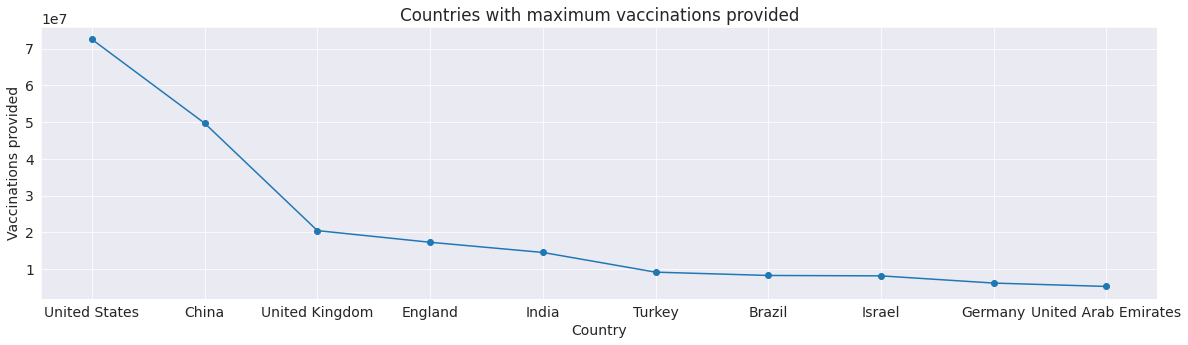

In [ ]:
top_access_countries = covid_world.groupby(covid_world.index).daily_vaccinations.sum().sort_values(ascending = False).head(10)
plt.figure(figsize=(20,5))
plt.xlabel('Country')
plt.ylabel('Vaccinations provided')
plt.title('Countries with maximum vaccinations provided')

plt.plot(top_access_countries,marker='o')

United States getting the most vaccinations provided. Well the conditions there are the most severe as well and thus this way we could ensure that the conditions will get better relatively soon. 

Let's find out how many people are getting vaccinated on daily basis in every country. We will not analyze every country though as the graph might get a little confusing and we would not able to get much inforomation from it. So let's view the top 10 countries. 

**Q.** The growth in number of vaccinations daily availabe for every country

In [ ]:
import numpy as np 

def plot_variation(df,feature,title,countries):
  n=1000000
  data = []
  for country in countries:
    datafile = df.loc[df.country == country]
    trace = go.Scatter(
            x = datafile['date'],y = datafile[feature],
            name=country,
            mode = "markers+lines",
            marker_line_width = 1,
            marker_size = 8,
            marker_symbol = 'circle',
            text=datafile['country'],)
    data.append(trace)
  fig = dict(data=data)
  iplot(fig, filename='all_countries')

In [ ]:
names=covid_world['country'].unique().tolist()
plot_variation(covid_world, 'daily_vaccinations', 'Total vaccination percent evolution (selected countries, log scale)', names)

Let's view the top 40 countries with the highest mean vaccination per million.

**Q.** Top 40 countries with highest mean vaccination per million

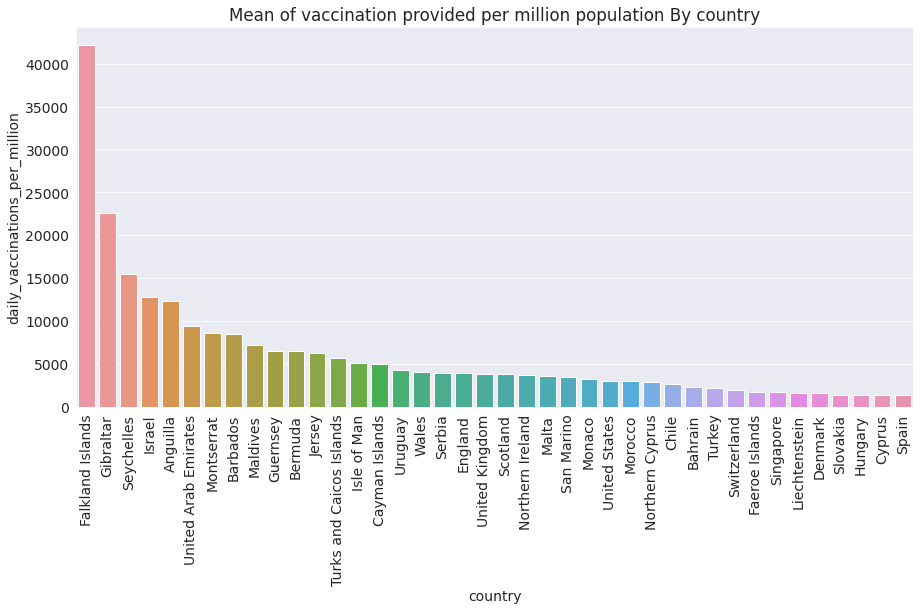

In [ ]:
mean_vacc_per_mill = covid_world.groupby(covid_world.index).mean().sort_values(by='daily_vaccinations_per_million',ascending=False)
fig,ax=plt.subplots(figsize=(15,7))
plt.title('Mean of vaccination provided per million population By country')
plt.xticks(rotation=90)
sns.barplot(x=mean_vacc_per_mill.head(40).index,y=mean_vacc_per_mill['daily_vaccinations_per_million'].head(40))

We could see that the countries with the less amount of population are much ahead as they should be. Providing the bigger population size coutries is still a work in progress and will be quite a tough task. But yeah , the governments are working on it and we will soon achieve it. 

**Q.** The sum of all the vaccinations availabe daily worldwide representing the top 20 days when maximum people were vaccinated.

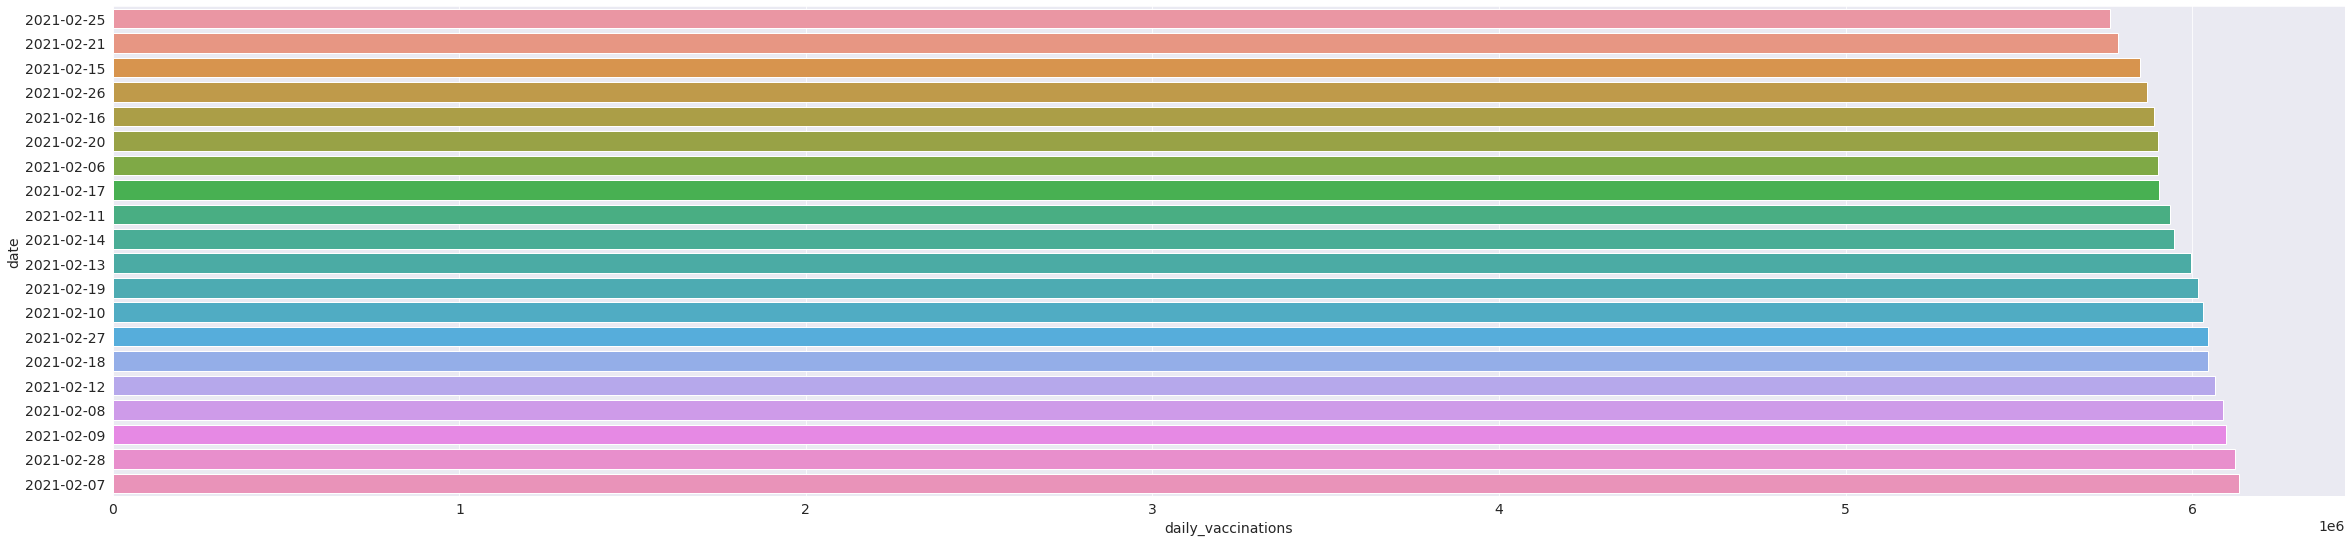

In [ ]:
covid_inc = covid_world.groupby('date').daily_vaccinations.sum().sort_values()
doses_inc = covid_inc.tail(20)
plt.figure(figsize=(40,9))
sns.barplot(x=doses_inc,y=doses_inc.index)

So the highest number of vaccinations were done on the 7th of Feb. The rates are increasing and the numbers will soon reach newer heights. 

Let's check out now the daily vaccinations provided by each company, this way we could find out who are the top suppliers of the vaccine. 

**Q.** - The number of vaccinations provided by each company worldwide and the company serving maximum number of countries respectively 

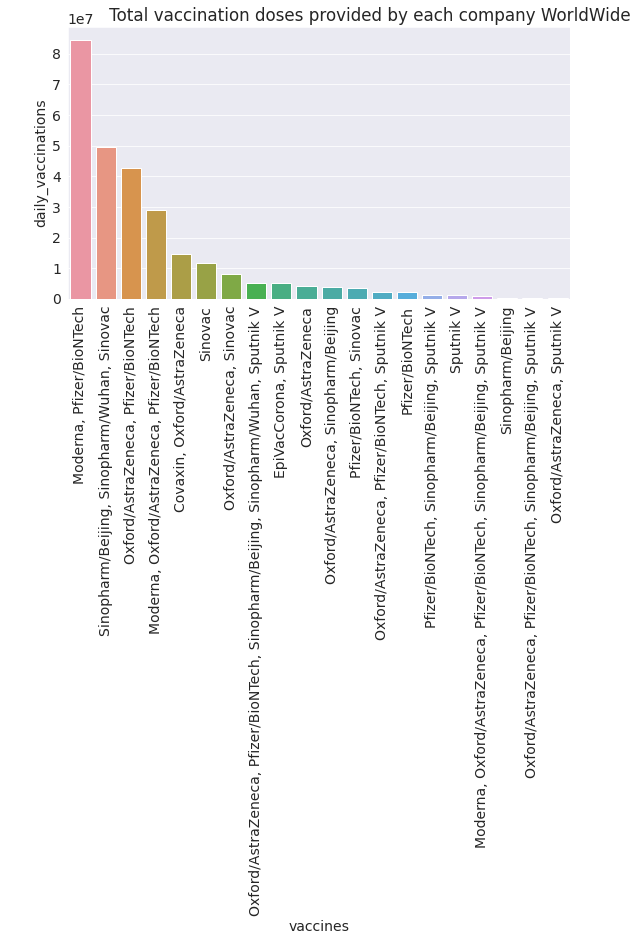

In [ ]:
vaccines_per_company = covid_world.groupby('vaccines').sum()
vaccines_per_company_total = vaccines_per_company.sort_values(by='daily_vaccinations', ascending=False)
plt.xticks(rotation=90)
sns.set_style('whitegrid')
plt.title('                   Total vaccination doses provided by each company WorldWide')
sns.barplot(x=vaccines_per_company_total.head(20).index,y=vaccines_per_company_total.head(20).daily_vaccinations)

Now let's checkout which medical firm is serving to how many countries. This way we could analyze the pressure the companies are facing as they need to manufacture an enormous amount of vaccines and serve to different nations. 

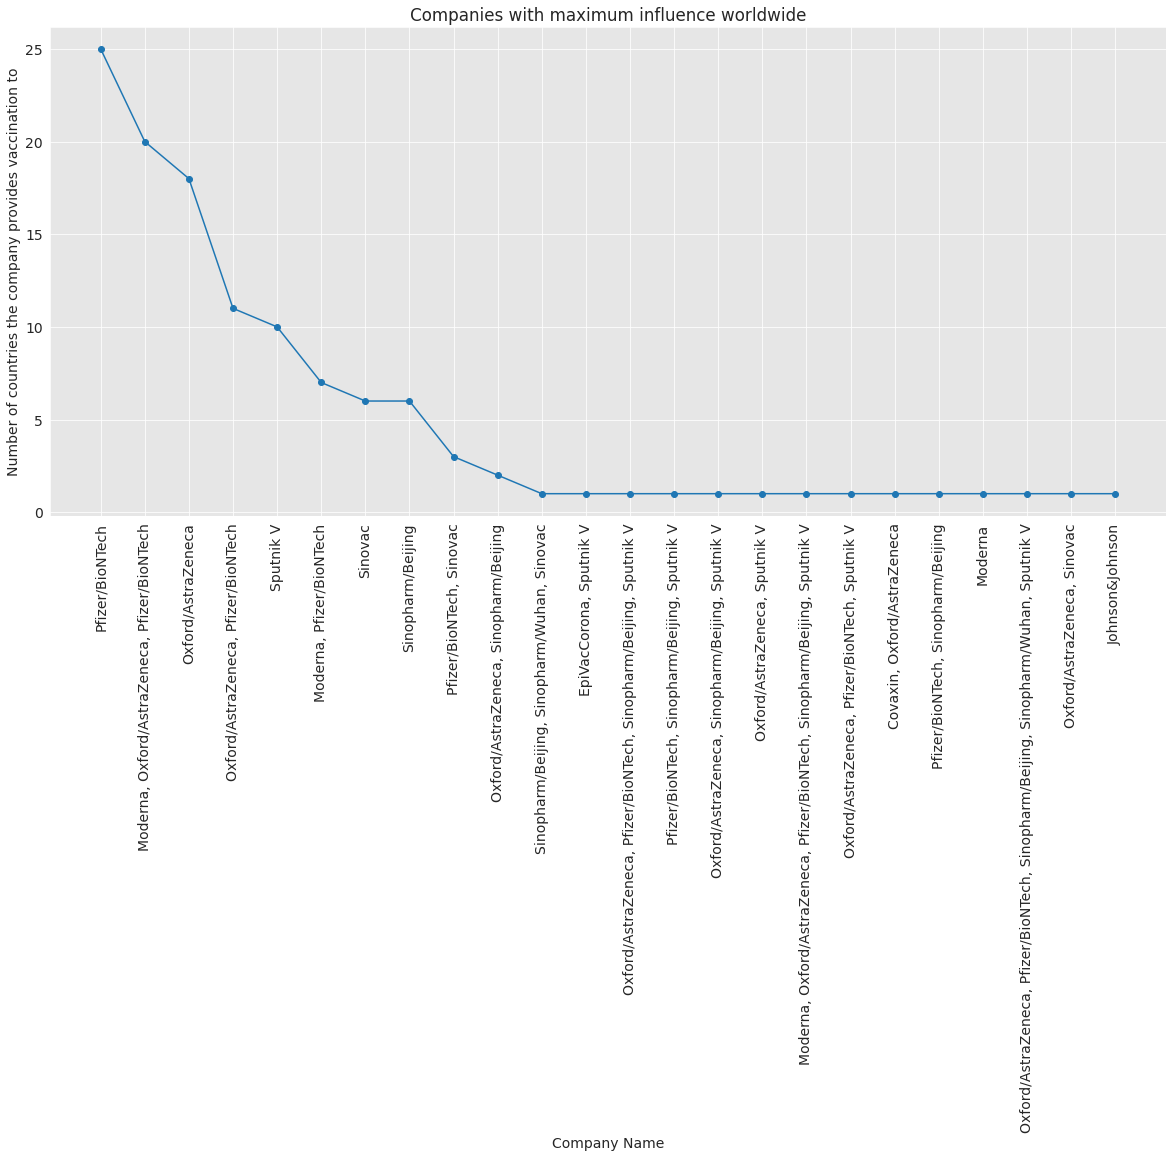

In [ ]:
vaccines_per_company_count = covid_world.groupby(by=covid_world.columns, axis=1).sum()
new_covid_world = covid_world.drop(columns=['country'],axis=1)
vaccines_per_country_count = new_covid_world.groupby('country')['vaccines'].apply(frozenset).reset_index()
val = vaccines_per_country_count['vaccines'].value_counts()
vaccines_per_country_count = vaccines_per_country_count['vaccines'].value_counts().sort_values()
val1 = pd.DataFrame(list(val), columns=['vaccine'])
sets = val.index
new_list = ([list(x) for x in sets])
df = pd.DataFrame(new_list,
                  columns=['company_name'])
val1['company_name'] =df


plt.figure(figsize=(20,9))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.title('Companies with maximum influence worldwide')
plt.ylabel('Number of countries the company provides vaccination to')
plt.xlabel('Company Name')
plt.xticks(rotation=90)
plt.plot(val1.company_name,val1.vaccine,marker='o')

Let us save and upload our work to Jovian before continuing

In [ ]:
import jovian

## Asking and Answering Questions



#### **Q1**: Top 10 countries with the access to the vaccination

Here, we get the sum of the covid vaccination doses provided in each country and get the top 10 countries where maximum doses were delivered till the date.

In [ ]:
top_access_countries = covid_world.groupby(covid_world.index).daily_vaccinations.sum().sort_values(ascending = False).head(10)

In [ ]:
top_access_countries

country
United States           72527910.0
China                   49687760.0
United Kingdom          20446992.0
England                 17273340.0
India                   14503602.0
Turkey                   9135907.0
Brazil                   8235747.0
Israel                   8125959.0
Germany                  6164452.0
United Arab Emirates     5244772.0
Name: daily_vaccinations, dtype: float64

#### **Q2**: Increase in daily vaccination count in top 10 countries with max vaccination count 

We firstly use the data distribute the data grouped by country into a lists of dataframes and then we calculate the sum and distribute our data according. As a result we get rate of increase in covid doses for the countries with maximum doses distributed. 

In [ ]:
import numpy as np 

def get_variation(df,feature,countries):
  data = []
  for country in countries:
    datafile = df.loc[df.country == country]
    trace = [datafile['date'],datafile[feature]]
    data.append(trace)
  return data

In [ ]:
country_names = covid_world['country'].unique().tolist()
result_variations = get_variation(covid_world,'daily_vaccinations',country_names)

#### **Q3**: Countries with highest mean vaccination per million on daily basis

To acheive our goal we group our data by country and then sort the mean of daily vaccinations per million. As a result we get the countries that are fastest in distributing the vaccines compared to the population of the country. 

In [ ]:
mean_vacc_per_mill = covid_world.groupby(covid_world.index).mean().sort_values(by='daily_vaccinations_per_million',ascending=False)

In [ ]:
mean_vacc_per_mill

,total_vaccinations,people_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,daily_vaccinations_per_million
country,,,,,,,
Falkland Islands,1.082333e+03,1.082333e+03,NaN,147.000000,31.076667,31.076667,42205.200000
Gibraltar,1.883908e+04,1.332712e+04,744.723404,760.800000,55.917551,39.557143,22581.800000
Seychelles,3.964259e+04,3.141372e+04,2285.687500,1529.470588,40.311250,31.943125,15552.882353
Israel,3.958742e+06,2.625131e+06,113907.150685,111314.506849,45.736351,30.328919,12860.506849
Anguilla,2.008000e+03,2.008000e+03,1421.000000,185.590909,13.385000,13.385000,12371.090909
...,...,...,...,...,...,...,...
Thailand,1.595000e+02,NaN,NaN,160.000000,0.000000,NaN,2.000000
Venezuela,7.850000e+01,7.850000e+01,NaN,31.000000,0.000000,0.000000,1.000000
Greenland,2.584000e+03,2.584000e+03,NaN,NaN,4.550000,4.550000,NaN


#### **Q4**: Top 20 days with most doses provided worldwide 

We find out the days most doses were delivered worldwide by grouping our data by date and obtaining to sum of daily vaccinations.

In [ ]:
covid_inc = covid_world.groupby('date').daily_vaccinations.sum().sort_values()

In [ ]:
doses_inc = covid_inc.tail(20)

In [ ]:
doses_inc

date
2021-02-25    5764102.0
2021-02-21    5786755.0
2021-02-15    5848865.0
2021-02-26    5868665.0
2021-02-16    5890901.0
2021-02-20    5900482.0
2021-02-06    5902024.0
2021-02-17    5904661.0
2021-02-11    5936284.0
2021-02-14    5948941.0
2021-02-13    5996156.0
2021-02-19    6015999.0
2021-02-10    6032408.0
2021-02-27    6044341.0
2021-02-18    6045500.0
2021-02-12    6066852.0
2021-02-08    6088932.0
2021-02-09    6097382.0
2021-02-28    6124297.0
2021-02-07    6133896.0
Name: daily_vaccinations, dtype: float64

#### **Q5**: Maximum vaccination provided by companies and the companies facilitating most countries to fight this global battle 

Firstly, we group our data by vaccines and calculate sum of daily_vaccinations. As a result we get the sum of vaccines provided by each compnay. Moreover, we find the companies delivering the doses to each countries listed below and then we count the total countries each company delivers doses to. Thereby we obtain the top companies facilitating most of the countries to help fight this battle.

In [ ]:
vaccines_per_company = covid_world.groupby('vaccines').sum()

In [ ]:
vaccines_per_company_total = vaccines_per_company.sort_values(by='daily_vaccinations', ascending=False)

In [ ]:
vaccines_per_company_count = covid_world.groupby(by=covid_world.columns, axis=1).sum()

In [ ]:
vaccines_per_company_count

,country,daily_vaccinations,daily_vaccinations_per_million,daily_vaccinations_raw,date,iso_code,people_vaccinated,people_vaccinated_per_hundred,source_name,source_website,total_vaccinations,total_vaccinations_per_hundred,vaccines
country,,,,,,,,,,,,,
Albania,Albania,0.0,0.0,0.0,2021-01-10,ALB,0.0,0.00,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...,0.0,0.00,Pfizer/BioNTech
Albania,Albania,64.0,22.0,0.0,2021-01-11,ALB,0.0,0.00,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...,0.0,0.00,Pfizer/BioNTech
Albania,Albania,64.0,22.0,0.0,2021-01-12,ALB,128.0,0.00,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...,128.0,0.00,Pfizer/BioNTech
Albania,Albania,63.0,22.0,60.0,2021-01-13,ALB,188.0,0.01,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...,188.0,0.01,Pfizer/BioNTech
Albania,Albania,66.0,23.0,78.0,2021-01-14,ALB,266.0,0.01,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...,266.0,0.01,Pfizer/BioNTech
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,Zimbabwe,1750.0,118.0,1572.0,2021-02-26,ZWE,12579.0,0.08,Ministry of Health,https://twitter.com/MoHCCZim/status/1366851011...,12579.0,0.08,Sinopharm/Beijing
Zimbabwe,Zimbabwe,2150.0,145.0,3126.0,2021-02-27,ZWE,15705.0,0.11,Ministry of Health,https://twitter.com/MoHCCZim/status/1366851011...,15705.0,0.11,Sinopharm/Beijing
Zimbabwe,Zimbabwe,2551.0,172.0,3138.0,2021-02-28,ZWE,18843.0,0.13,Ministry of Health,https://twitter.com/MoHCCZim/status/1366851011...,18843.0,0.13,Sinopharm/Beijing


In [ ]:
new_covid_world = covid_world.drop(columns=['country'],axis=1)

In [ ]:
vaccines_per_country_count = new_covid_world.groupby('country')['vaccines'].apply(frozenset).reset_index()

In [ ]:
val = vaccines_per_country_count['vaccines'].value_counts()

In [ ]:
vaccines_per_country_count = vaccines_per_country_count['vaccines'].value_counts().sort_values()

In [ ]:
val1 = pd.DataFrame(list(val), columns=['vaccine'])

In [ ]:
sets = val.index
new_list = ([list(x) for x in sets])
df = pd.DataFrame(new_list,
                  columns=['company_name'])

In [ ]:
val1['company_name'] =df

In [ ]:
val1

,vaccine,company_name
0,25,Pfizer/BioNTech
1,20,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
2,18,Oxford/AstraZeneca
3,11,"Oxford/AstraZeneca, Pfizer/BioNTech"
4,10,Sputnik V
5,7,"Moderna, Pfizer/BioNTech"
6,6,Sinovac
7,6,Sinopharm/Beijing
8,3,"Pfizer/BioNTech, Sinovac"
9,2,"Oxford/AstraZeneca, Sinopharm/Beijing"


Let us save and upload our work to Jovian before continuing.

In [ ]:
import jovian

## Inferences and Conclusion

Analyzing the data set of Covid 19 vaccination provided worldwide we did a thorough analysis of the speed of vaccinations availability worldwide. It is clearly visible that United States had the highest number of doses distributed but when it comes to the ratio of number of doses vs the population we can observe that United States is not in the lead. Analyzing the number of doses delivered by different companies we can say Pfizer and BioNTech togather are supporting over 40 countries by providing over 50 million vaccinations doses worldwide. The data set can be improved if we can find the number of increase in the production rate of vaccination. But we have sufficient data to form a linear regression model to predict the future trend of doses avaibility. 

In [ ]:
jovian.commit("covid-19-vaccination-progress")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/vrajesh1/covid-19-vaccination-progress


'https://jovian.ai/vrajesh1/covid-19-vaccination-progress'

## References and Future Work

Dataset https://www.kaggle.com/gpreda/covid-world-vaccination-progress

Other helpful sources
  Stack Overflow  
  https://stackoverflow.com/questions/36392735/how-to-combine-multiple-rows-into-a-single-row-with-pandas  
  https://www.kaggle.com/mrinalchandramishra/predicting-vaccination-done-in-future 
  
  https://www.kaggle.com/gpreda/covid-19-vaccination-progress

In [ ]:
import jovian